# BE Smart Cities

    LEININGER Lucas    
    MARQUES Maxime    
    RENAUD Kévin    
    TURLAN Martin
    
## _Dynamic Models for Building Energy Management_



### I- Description of the building
#### [ajouter la photo des 2 pièces + les flèches des flux (ne pas garder le radiateur sur le mur 1), conserver les notations des longueurs + Ajouter photo des dimensions portes et fenetres]

 We considered a building with two rooms separated by a small wall with a door. The left room is designed withe two windows and the right room with a door and a window. The different heat flux are represented by arrows. Each wall is marked with a number.  
 The building's scale is 10m by 4m.  
 We assume that the solar irradiation is the same for each wall (which is not correct because the orientation of the wall change this value but for the purpose of the simulation we will ignore this variation. We also consider the temperature in the rooms as homogeneous.  
 In a first time there is no heating or cooling system, nor ventilation.  
For this study we only consider unidirectionnal heat flows.  


### II- Thermal model

Concerning the walls, we choose a model with two layers, the first is concrete and the second insulator.
#### [image à faire fonctionner(c'est celle que lucas a mis en bas)]
![image.png](attachment:187d2e41-13ca-41f6-b510-0b11cadb73d7.png)

 The thermal model is drawn below:  
#### [Ajouter photo schéma electrique]
As the wall between the two rooms is small and not made of concrete (generally plaster), we only consider one layer of resistance and capacity. The doors and windows of each room are regrouped together into one resistance between the outdoor temperature and the indoor temperature. Except for the door between both that can't be taken in this group. The nodes 1 and 2 respectively represent the temperatures of the left and right room. Each node has an assignated number and it is the same for the resistances, we did it in order to create the mathematical model.

### III- Mathematical model 

The thermal circuit is discribed by the diferential-algebraic set of equations:

$$C \dot{\theta} = -(A^T G A) \theta + A^T G b + f$$
$$q = G (-A \theta + b)$$



The relevant matrices were identified as follows:
- The A-matrix has a number of lines equal to the number of flows and a number of
columns equal to the number of nodes. It defines how a flow is connected to nodes. If
the path from the branch to the node is in the same direction as the flow is (the direction
was decided during the design of the thermal model ), then the corresponding
coefficient in the A-matrix will be 1. If the flow is in the opposite direction, the
coefficient will be -1.  

We have:

A = np.zeros([43, 35])  
A[36, 0] , A[37,0] , A[38,0] , A[15,0] , A[16,0] , A[19,0] = 1, 1, 1, 1, -1, -1;  
A[39, 1], A[19, 1], A[40, 1], A[35,1],A[41,1], A[42,1]= 1, 1, 1, 1, 1, 1;  
A[13, 2], A[14, 2] = 1, -1;  
A[11, 3], A[12, 3] = 1, -1;  
A[10, 4], A[11, 4] = 1, -1;  
A[8, 5], A[9, 5] = 1, -1;  
A[6, 6], A[7, 6] = 1, -1;  
A[5, 7], A[6, 7] = 1, -1;  
A[3, 8], A[4, 8] = 1, -1;  
A[1, 9], A[2, 9] = 1, -1;  
A[0, 10], A[1, 10] = 1, -1;  
A[16, 11], A[17, 11] = 1, -1;  
A[17, 12], A[18, 12] = 1, -1;  
A[20, 13], A[21, 13] = -1, 1;  
A[22, 14], A[23, 14] = -1, 1;  
A[23, 15], A[24, 15] = -1, 1;  
A[25, 16], A[26, 16] = -1, 1;  
A[27, 17], A[28, 17] = -1, 1;  
A[28, 18], A[29, 18] = -1, 1;  
A[30, 19], A[31, 19] = -1, 1;  
A[32, 20], A[33, 20] = -1, 1;  
A[33, 21], A[34, 21] = -1, 1;  
A[4,22], A[36,22]= 1, -1;  
A[9,23], A[37,23]= 1,-1;  
A[14,24], A[38,24]= 1,-1;  
A[18,25], A[39,25]= 1,-1;  
A[20,26], A[40,26]= 1,-1;  
A[25,27], A[41,27]= 1,-1;  
A[30,28], A[42,28]= 1,-1;  
A[2,29], A[3,29]= 1,-1;  
A[7,30], A[8,30]= 1,-1;  
A[12,31], A[13,31]= 1,-1;  
A[22,32], A[21,32]= 1,-1;  
A[27,33], A[26,33]= 1,-1;  
A[32,34], A[31,34]= 1,-1;  

- G represents the resistances of the different surfaces (conduction or convection), while
C represents the capacity of the walls. Those matrices are therefore defined by our
choices of dimensions and materials.  

We have:  

G=np.zeros([43,43])  
G[0,0]=h.iloc[0]['out']*Slat  
G[1,1]=2* wall['Conductivity'][0]*Slat/wall['Width'][0]  
G[2,2]=2* wall['Conductivity'][0]*Slat/wall['Width'][0]  
G[3,3]=2* wall['Conductivity'][1]*Slat/wall['Width'][1]  
G[4,4]=2* wall['Conductivity'][1]*Slat/wall['Width'][1]  
G[5,5]=h.iloc[0]['out']*Swlargg  
G[6,6]=2* wall['Conductivity'][0]*Swlargg/wall['Width'][0]  
G[7,7]=2* wall['Conductivity'][0]*Swlargg/wall['Width'][0]  
G[8,8]=2* wall['Conductivity'][1]*Swlargg/wall['Width'][1]  
G[9,9]=2* wall['Conductivity'][1]*Swlargg/wall['Width'][1]  
G[10,10]=h.iloc[0]['out']*Swlatg  
G[11,11]=2* wall['Conductivity'][0]*Swlatg/wall['Width'][0]  
G[12,12]=2* wall['Conductivity'][0]*Swlatg/wall['Width'][0]  
G[13,13]=2* wall['Conductivity'][1]*Swlatg/wall['Width'][1]  
G[14,14]=2* wall['Conductivity'][1]*Swlatg/wall['Width'][1]  
G[15,15]=2* 2* wall['Conductivity'][2]*Sg/wall['Width'][2] # 2 windows  
G[16,16]=h.iloc[0]['in']*Swlargp  
G[17,17]=2* wall['Conductivity'][1]*Swlargp/wall['Width'][1]  
G[18,18]=2* wall['Conductivity'][1]*Swlargp/wall['Width'][1]  
G[19,19]=2* wall['Conductivity'][2]*Sporte/wall['Width'][2]  
G[20,20]=2* wall['Conductivity'][1]*Slat/wall['Width'][1]  
G[21,21]=2* wall['Conductivity'][1]*Slat/wall['Width'][1]  
G[22,22]=2* wall['Conductivity'][0]*Slat/wall['Width'][0]  
G[23,23]=2* wall['Conductivity'][0]*Slat/wall['Width'][0]  
G[24,24]=h.iloc[0]['out']*Slat  
G[25,25]=2* wall['Conductivity'][1]*Swlargg/wall['Width'][1]  
G[26,26]=2* wall['Conductivity'][1]*Swlargg/wall['Width'][1]  
G[27,27]=2* wall['Conductivity'][0]*Swlargg/wall['Width'][0]  
G[28,28]=2* wall['Conductivity'][0]*Swlargg/wall['Width'][0]  
G[29,29]=h.iloc[0]['out']*Swlargg  
G[30,30]=2* wall['Conductivity'][1]*Swlatp/wall['Width'][1]  
G[31,31]=2* wall['Conductivity'][1]*Swlatp/wall['Width'][1]  
G[32,32]=2* wall['Conductivity'][0]*Swlatp/wall['Width'][0]  
G[33,33]=2* wall['Conductivity'][0]*Swlatp/wall['Width'][0]  
G[34,34]=h.iloc[0]['out']*Swlatp  
G[35,35]=2* wall['Conductivity'][2]*Sporte/wall['Width'][2]  
G[36,36]=h.iloc[0]['in']*Slat  
G[37,37]=h.iloc[0]['in']*Swlargg  
G[38,38]=h.iloc[0]['in']*Swlatg  
G[39,39]=h.iloc[0]['in']*Swlargp  
G[40,40]=h.iloc[0]['in']*Slat  
G[41,41]=h.iloc[0]['in']*Swlargg  
G[42,42]=h.iloc[0]['in']*Swlatp  

The f and b matrices represents the constraints imposed on the model.
- For f, we mark nodes where there is a source.  

we have :  

f = np.zeros(35)  
f[[10, 7, 4 ,11, 25, 15, 18, 21, 22, 23, 24, 26, 27, 28]] = 1  
- For b, we mark branches connected to a temperature (outside temperature for example).  

we have :  

b = np.zeros(43)  
b[[0, 5, 10, 15, 24, 29, 34, 35]] = 1  

-C represent the capacities in the thermal circuit, for each node if there is no capacity then the value is 0.  

we have:  

C=np.zeros([35,35])  
C[0,0]=0  
C[1,1]=0  
C[2,2]=Swlatg*wall['Width'][1]*wall['Density'][1]*wall['Specific heat'][1]  
C[3,3]=Swlatg*wall['Width'][0]*wall['Density'][0]*wall['Specific heat'][0]  
C[4,4]=0  
C[5,5]=Swlargg*wall['Width'][1]*wall['Density'][1]*wall['Specific heat'][1]  
C[6,6]=Swlargg*wall['Width'][0]*wall['Density'][0]*wall['Specific heat'][0]  
C[7,7]=0  
C[8,8]=Slat*wall['Width'][1]*wall['Density'][1]*wall['Specific heat'][1]  
C[9,9]=Slat*wall['Width'][0]*wall['Density'][0]*wall['Specific heat'][0]  
C[10,10]=0  
C[11,11]=0  
C[12,12]=Swlargp*wall['Width'][0]*wall['Density'][0]*wall['Specific heat'][0]  
C[13,13]=Slat*wall['Width'][1]*wall['Density'][1]*wall['Specific heat'][1]  
C[14,14]=0  
C[15,15]=Slat*wall['Width'][1]*wall['Density'][0]*wall['Specific heat'][0]  
C[16,16]=Swlargg*wall['Width'][1]*wall['Density'][1]*wall['Specific heat'][1]  
C[17,17]=0  
C[18,18]=Swlargg*wall['Width'][0]*wall['Density'][0]*wall['Specific heat'][0]  
C[19,19]=Swlargp*wall['Width'][1]*wall['Density'][1]*wall['Specific heat'][1]  
C[20,20]=0  
C[21,21]=Swlargp*wall['Width'][0]*wall['Density'][0]*wall['Specific heat'][0]  
C[22,22]=0  
C[23,23]=0  
C[24,24]=0  
C[25,25]=0  
C[26,26]=0  
C[27,27]=0  
C[28,28]=0  
...=0  

#### Parameters
H=2.5  (m hauteur pièces)   
h=2  (m hauteur portes)  
v=1  (m hauteur fenêtre carrée)  
p=0.8  (m epaisseur porte)  
L=10  (m longueur latérale batiment)  
l=4  (m largeur batiment)  

Sg = v**2  ( m² surface of the glass wall)  
Sporte=p*h (m² surface of a door)  
Slarg=l*H  (m² surface of concrete and insultion of the largitudinal wall)   
Slat=L/2 *H  (m² surface of concrete and insultion of the lateral wall)  
Swlatp=Slat -Sporte   (m² surface of concrete and insulation of the lateral wall with a door)  
Swlatg=Slat -Sg  (surface of concrete and insulation of the lateral wall with a window)  
Swlargg=Slarg -Sg   (m² surface of concrete and insulation of the largitudinal wall with a window)  
Swlargp=Slarg -Sporte (m² surface of concrete and insulation of the lateral wall with a door)  

air = {'Density': 1.2,                      # kg/m³  
       'Specific heat': 1000}               # J/kg.K  


wall = {'Conductivity': [1.4, 0.027, 1.4],  # W/m.K  
        'Density': [2300, 55, 2500],        # kg/m³  
        'Specific heat': [880, 1210, 750],  # J/kg.K  
        'Width': [0.2, 0.08, 0.004],  
        'Slices': [4, 2, 1]}                # number of discretizations  
wall = pd.DataFrame(wall, index=['Concrete', 'Insulation', 'Glass'])

### IV- Model implementation in Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dm4bem

#phisical variables
Text=20


# P-controler gain
Kp = 1e4            # almost perfect controller Kp -> ∞
Kp = 1e-3           # no controller Kp -> 0

#variables
H=2.5 # m hauteur pièces 
h=2 # m hauteur portes
v=1 # m hauteur fenêtre carrée
p=0.8 # m epaisseur porte
L=10 # m longueur latérale batiment
l=4 # m largeur batiment

Sg = v**2  # m² surface of the glass wall
Sporte=p*h # m² surface of a door
Slarg=l*H # m² surface of concrete and insultion of the largitudinal wall
Slat=L/2 *H # m² surface of concrete and insultion of the lateral wall
Swlatp=Slat -Sporte   # m² surface of concrete and insulation of the lateral wall with a door
Swlatg=Slat -Sg # m² surface of concrete and insulation of the lateral wall with a window
Swlargg=Slarg -Sg # m² surface of concrete and insulation of the largitudinal wall with a window
Swlargp=Slarg -Sporte # m² surface of concrete and insulation of the lateral wall with a door
no_t=35


air = {'Density': 1.2,                      # kg/m³
       'Specific heat': 1000}               # J/kg.K


wall = {'Conductivity': [1.4, 0.027, 1.4],  # W/m.K
        'Density': [2300, 55, 2500],        # kg/m³
        'Specific heat': [880, 1210, 750],  # J/kg.K
        'Width': [0.2, 0.08, 0.004],
        'Surface': [5 * l**2, 5 * l**2, l**2],  # m²
        'Slices': [4, 2, 1]}                # number of discretizations
wall = pd.DataFrame(wall, index=['Concrete', 'Insulation', 'Glass'])




ε_wLW = 0.9     # long wave wall emmisivity (concrete)
α_wSW = 0.2     # absortivity white surface
ε_gLW = 0.9     # long wave glass emmisivity (glass pyrex)
τ_gSW = 0.83    # short wave glass transmitance (glass)
α_gSW = 0.1     # short wave glass absortivity

σ = 5.67e-8     # W/m².K⁴ Stefan-Bolzmann constant

Fwg = 1 / 5     # view factor wall - glass

Tm = 273+20   # mean temp for radiative exchange


# convection coefficients, W/m² K
h = pd.DataFrame([{'in': 4., 'out': 10}])






A = np.zeros([43, 35])
A[36, 0] , A[37,0] , A[38,0] , A[15,0] , A[16,0] , A[19,0] = 1, 1, 1, 1, -1, -1
A[39, 1], A[19, 1], A[40, 1], A[35,1],A[41,1], A[42,1]= 1, 1, 1, 1, 1, 1
A[13, 2], A[14, 2] = 1, -1
A[11, 3], A[12, 3] = 1, -1
A[10, 4], A[11, 4] = 1, -1
A[8, 5], A[9, 5] = 1, -1
A[6, 6], A[7, 6] = 1, -1
A[5, 7], A[6, 7] = 1, -1
A[3, 8], A[4, 8] = 1, -1
A[1, 9], A[2, 9] = 1, -1
A[0, 10], A[1, 10] = 1, -1
A[16, 11], A[17, 11] = 1, -1
A[17, 12], A[18, 12] = 1, -1
A[20, 13], A[21, 13] = -1, 1
A[22, 14], A[23, 14] = -1, 1
A[23, 15], A[24, 15] = -1, 1
A[25, 16], A[26, 16] = -1, 1
A[27, 17], A[28, 17] = -1, 1
A[28, 18], A[29, 18] = -1, 1
A[30, 19], A[31, 19] = -1, 1
A[32, 20], A[33, 20] = -1, 1
A[33, 21], A[34, 21] = -1, 1
A[4,22], A[36,22]= 1, -1
A[9,23], A[37,23]= 1,-1
A[14,24], A[38,24]= 1,-1
A[18,25], A[39,25]= 1,-1
A[20,26], A[40,26]= 1,-1
A[25,27], A[41,27]= 1,-1
A[30,28], A[42,28]= 1,-1
A[2,29], A[3,29]= 1,-1
A[7,30], A[8,30]= 1,-1
A[12,31], A[13,31]= 1,-1
A[22,32], A[21,32]= 1,-1
A[27,33], A[26,33]= 1,-1
A[32,34], A[31,34]= 1,-1



#np.set_printoptions(suppress=False)
#print(A)
        
G=np.zeros([43,43])
G[0,0]=h.iloc[0]['out']*Slat
G[1,1]=2* wall['Conductivity'][0]*Slat/wall['Width'][0]
G[2,2]=2* wall['Conductivity'][0]*Slat/wall['Width'][0]
G[3,3]=2* wall['Conductivity'][1]*Slat/wall['Width'][1]
G[4,4]=2* wall['Conductivity'][1]*Slat/wall['Width'][1]
G[5,5]=h.iloc[0]['out']*Swlargg
G[6,6]=2* wall['Conductivity'][0]*Swlargg/wall['Width'][0]
G[7,7]=2* wall['Conductivity'][0]*Swlargg/wall['Width'][0]
G[8,8]=2* wall['Conductivity'][1]*Swlargg/wall['Width'][1]
G[9,9]=2* wall['Conductivity'][1]*Swlargg/wall['Width'][1]
G[10,10]=h.iloc[0]['out']*Swlatg
G[11,11]=2* wall['Conductivity'][0]*Swlatg/wall['Width'][0]
G[12,12]=2* wall['Conductivity'][0]*Swlatg/wall['Width'][0]
G[13,13]=2* wall['Conductivity'][1]*Swlatg/wall['Width'][1]
G[14,14]=2* wall['Conductivity'][1]*Swlatg/wall['Width'][1]
G[15,15]=2* 2* wall['Conductivity'][2]*Sg/wall['Width'][2] # 2 windows
G[16,16]=h.iloc[0]['in']*Swlargp
G[17,17]=2* wall['Conductivity'][1]*Swlargp/wall['Width'][1]
G[18,18]=2* wall['Conductivity'][1]*Swlargp/wall['Width'][1]
G[19,19]=2* wall['Conductivity'][2]*Sporte/wall['Width'][2]
G[20,20]=2* wall['Conductivity'][1]*Slat/wall['Width'][1]
G[21,21]=2* wall['Conductivity'][1]*Slat/wall['Width'][1]
G[22,22]=2* wall['Conductivity'][0]*Slat/wall['Width'][0]
G[23,23]=2* wall['Conductivity'][0]*Slat/wall['Width'][0]
G[24,24]=h.iloc[0]['out']*Slat
G[25,25]=2* wall['Conductivity'][1]*Swlargg/wall['Width'][1]
G[26,26]=2* wall['Conductivity'][1]*Swlargg/wall['Width'][1]
G[27,27]=2* wall['Conductivity'][0]*Swlargg/wall['Width'][0]
G[28,28]=2* wall['Conductivity'][0]*Swlargg/wall['Width'][0]
G[29,29]=h.iloc[0]['out']*Swlargg
G[30,30]=2* wall['Conductivity'][1]*Swlatp/wall['Width'][1]
G[31,31]=2* wall['Conductivity'][1]*Swlatp/wall['Width'][1]
G[32,32]=2* wall['Conductivity'][0]*Swlatp/wall['Width'][0]
G[33,33]=2* wall['Conductivity'][0]*Swlatp/wall['Width'][0]
G[34,34]=h.iloc[0]['out']*Swlatp
G[35,35]=2* wall['Conductivity'][2]*Sporte/wall['Width'][2]
G[36,36]=h.iloc[0]['in']*Slat
G[37,37]=h.iloc[0]['in']*Swlargg
G[38,38]=h.iloc[0]['in']*Swlatg
G[39,39]=h.iloc[0]['in']*Swlargp
G[40,40]=h.iloc[0]['in']*Slat
G[41,41]=h.iloc[0]['in']*Swlargg
G[42,42]=h.iloc[0]['in']*Swlatp

#G=np.eye(43)

C=np.zeros([35,35])
C[0,0]=0
C[1,1]=0
C[2,2]=Swlatg*wall['Width'][1]*wall['Density'][1]*wall['Specific heat'][1]
C[3,3]=Swlatg*wall['Width'][0]*wall['Density'][0]*wall['Specific heat'][0]
C[4,4]=0
C[5,5]=Swlargg*wall['Width'][1]*wall['Density'][1]*wall['Specific heat'][1]
C[6,6]=Swlargg*wall['Width'][0]*wall['Density'][0]*wall['Specific heat'][0]
C[7,7]=0
C[8,8]=Slat*wall['Width'][1]*wall['Density'][1]*wall['Specific heat'][1]
C[9,9]=Slat*wall['Width'][0]*wall['Density'][0]*wall['Specific heat'][0]
C[10,10]=0
C[11,11]=0
C[12,12]=Swlargp*wall['Width'][0]*wall['Density'][0]*wall['Specific heat'][0]
C[13,13]=Slat*wall['Width'][1]*wall['Density'][1]*wall['Specific heat'][1]
C[14,14]=0
C[15,15]=Slat*wall['Width'][1]*wall['Density'][0]*wall['Specific heat'][0]
C[16,16]=Swlargg*wall['Width'][1]*wall['Density'][1]*wall['Specific heat'][1]
C[17,17]=0
C[18,18]=Swlargg*wall['Width'][0]*wall['Density'][0]*wall['Specific heat'][0]
C[19,19]=Swlargp*wall['Width'][1]*wall['Density'][1]*wall['Specific heat'][1]
C[20,20]=0
C[21,21]=Swlargp*wall['Width'][0]*wall['Density'][0]*wall['Specific heat'][0]
C[22,22]=0
C[23,23]=0
C[24,24]=0
C[25,25]=0
C[26,26]=0
C[27,27]=0
C[28,28]=0

f = np.zeros(35)
f[10]=1
f[22]=1
f[8]=1
f[23]=1
f[24]=1
f[4]=1
f[11]=1
f[25]=1
f[26]=1
f[15]=1
f[27]=1
f[28]=1
f[18]=1
f[21]=1
b = np.zeros(43)
f = np.zeros(35)

b[0]=Tm
b[5]=Tm
b[10]=Tm
b[15]=Tm
b[24]=Tm
b[29]=Tm
b[34]=Tm
b[35]=Tm

### V- Steady-state results


In [2]:

temp_steady_To = np.linalg.inv(A.T @ G @ A) @ (A.T @ G @ b)
np.set_printoptions(precision=3)
print('When To = 293°C, the temperatures in steady-state are:', temp_steady_To, '°C')
print(f'The indoor temperature are: {temp_steady_To[0]:.3f} °C and {temp_steady_To[2]:.3f}°C.')

When To = 293°C, the temperatures in steady-state are: [293. 293. 293. 293. 293. 293. 293. 293. 293. 293. 293. 293. 293. 293.
 293. 293. 293. 293. 293. 293. 293. 293. 293. 293. 293. 293. 293. 293.
 293. 293. 293. 293. 293. 293. 293.] °C
The indoor temperature are: 293.000 °C and 293.000°C.


Both temperatures of the indoor are the same as the temperature outdoor, this is the result that was expected, the model is not incoherent for the steady state.

### VI- Dynamic simulation results
#### A) Simulation with a step of 1°C

In [3]:
y = np.ones(35)
u = np.hstack([b[np.nonzero(b)], f[np.nonzero(f)]])

In [4]:
b = np.zeros(43)
b[[0, 5, 10, 15, 24, 29, 34, 35]] = 1
#print(b)
f = np.zeros(35)
f[[10, 7, 4 ,11, 25, 15, 18, 21, 22, 23, 24, 26, 27, 28]] = 1
#print(f)

In [5]:
y=np.zeros(35)
y[[0,1]]=1
#print(y)

[As, Bs, Cs, Ds] = dm4bem.tc2ss(A, G, b, C, f, y)

In [6]:
dtmax = min(-2. / np.linalg.eig(As)[0])
print(f'Maximum time step: {dtmax:.2f} s')

Maximum time step: 6861.77 s


In [7]:
dt=360
duration = 3600 * 24 * 5        # [s]
n = int(np.floor(duration / dt))
t = np.arange(0, n * dt, dt)    # time

# Vectors of state and input (in time)
n_tC = As.shape[0]              # no of state variables (temps with capacity)
# u = [To To To Tsp Phio Phii Qaux Phia]
u = np.zeros([22, n])
u[0:8, :] = np.ones([8, n])
#print (u)

temp_exp = np.zeros([n_tC, t.shape[0]])
temp_imp = np.zeros([n_tC, t.shape[0]])

In [8]:
I = np.eye(n_tC)
for k in range(n - 1):
    temp_exp[:, k + 1] = (I + dt * As) @\
        temp_exp[:, k] + dt * Bs @ u[:, k]
    temp_imp[:, k + 1] = np.linalg.inv(I - dt * As) @\
        (temp_imp[:, k] + dt * Bs @ u[:, k])

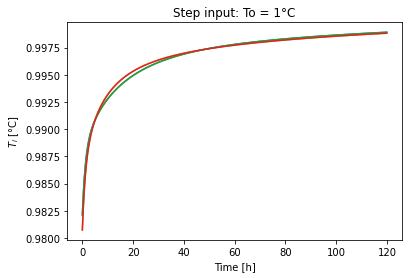

In [9]:
y_exp = Cs @ temp_exp + Ds @  u
y_imp = Cs @ temp_imp + Ds @  u

fig, ax = plt.subplots()
ax.plot(t / 3600, y_exp.T, t / 3600, y_imp.T)
ax.set(xlabel='Time [h]',
       ylabel='$T_i$ [°C]',
       title='Step input: To = 1°C')
plt.show()

We See that the output converge toward 1°C (the input). The simulation seem coherent, and this for both methods (explicit and implicit Euler). Now we can go for the simulation under real data input.

#### B) Simulation with weather data

In [10]:
filename = 'FRA_Lyon.074810_IWEC.epw'
start_date = '2000-01-03 12:00:00'
end_date = '2000-02-05 18:00:00'

# Read weather data from Energyplus .epw file
[data, meta] = dm4bem.read_epw(filename, coerce_year=None)
weather = data[["temp_air", "dir_n_rad", "dif_h_rad"]]
del data
weather.index = weather.index.map(lambda t: t.replace(year=2000))
weather = weather[(weather.index >= start_date) & (
    weather.index < end_date)]

In [11]:
surface_orientation = {'slope': 90,
                       'azimuth': 0,
                       'latitude': 45}
albedo = 0.2
rad_surf1 = dm4bem.sol_rad_tilt_surf(weather, surface_orientation, albedo)
rad_surf1['Φt1'] = rad_surf1.sum(axis=1)

In [12]:
data = pd.concat([weather['temp_air'], rad_surf1['Φt1']], axis=1)
data = data.resample(str(dt) + 'S').interpolate(method='linear')
data = data.rename(columns={'temp_air': 'To'})
print(data)

                              To         Φt1
2000-01-03 12:00:00+01:00   6.80   98.949619
2000-01-03 12:06:00+01:00   6.92  106.191097
2000-01-03 12:12:00+01:00   7.04  113.432575
2000-01-03 12:18:00+01:00   7.16  120.674053
2000-01-03 12:24:00+01:00   7.28  127.915531
...                          ...         ...
2000-02-05 16:36:00+01:00  10.40   47.573020
2000-02-05 16:42:00+01:00  10.30   37.779765
2000-02-05 16:48:00+01:00  10.20   27.986510
2000-02-05 16:54:00+01:00  10.10   18.193255
2000-02-05 17:00:00+01:00  10.00    8.400000

[7971 rows x 2 columns]


In [13]:
data['Ti0'] = 20 * np.ones(data.shape[0])
data['Ti1'] = 20 * np.ones(data.shape[0])
data['Qa'] = 0 * np.ones(data.shape[0])
print(data)

                              To         Φt1   Ti0   Ti1   Qa
2000-01-03 12:00:00+01:00   6.80   98.949619  20.0  20.0  0.0
2000-01-03 12:06:00+01:00   6.92  106.191097  20.0  20.0  0.0
2000-01-03 12:12:00+01:00   7.04  113.432575  20.0  20.0  0.0
2000-01-03 12:18:00+01:00   7.16  120.674053  20.0  20.0  0.0
2000-01-03 12:24:00+01:00   7.28  127.915531  20.0  20.0  0.0
...                          ...         ...   ...   ...  ...
2000-02-05 16:36:00+01:00  10.40   47.573020  20.0  20.0  0.0
2000-02-05 16:42:00+01:00  10.30   37.779765  20.0  20.0  0.0
2000-02-05 16:48:00+01:00  10.20   27.986510  20.0  20.0  0.0
2000-02-05 16:54:00+01:00  10.10   18.193255  20.0  20.0  0.0
2000-02-05 17:00:00+01:00  10.00    8.400000  20.0  20.0  0.0

[7971 rows x 5 columns]


In [14]:
t = dt * np.arange(data.shape[0])

In [15]:
u = pd.concat([data['To'], data['To'], data['To'],data['To'],data['To'],data['To'],data['To'],data['To'],
               α_wSW * Slat * data['Φt1'],
                α_wSW * Swlargg * data['Φt1'],
                α_wSW * Swlatg * data['Φt1'],
               τ_gSW * α_wSW* Swlatp* data['Φt1'],
                τ_gSW * α_wSW * Swlatp * data['Φt1'],
               α_wSW * Slat * data['Φt1'],
               α_wSW * Swlargg * data['Φt1'],
               α_wSW * Swlatp * data['Φt1'],
               τ_gSW * α_wSW * Slat * data['Φt1'],
               τ_gSW * α_wSW * Swlargg * data['Φt1'],
               τ_gSW * α_wSW * Swlatg * data['Φt1'],
               τ_gSW * α_wSW * Slat * data['Φt1'],
               τ_gSW * α_wSW * Swlargg * data['Φt1'],
               τ_gSW * α_wSW * Swlatp * data['Φt1']], axis=1)

##### u is built with its first values at To for fixed temperature of outdoor, and the following values are the flux due to radiation

In [16]:
temp_exp = 20 * np.ones([As.shape[0], u.shape[0]])

for k in range(u.shape[0] - 1):
    temp_exp[:, k + 1] = (I + dt * As) @ temp_exp[:, k]\
        + dt * Bs @ u.iloc[k, :]

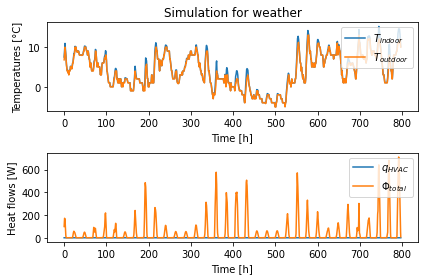

In [17]:
y_exp = Cs @ temp_exp + Ds @ u.to_numpy().T
Kp=0 # untill now we don't have HVAC (Kp=0)
q_HVAC = Kp * (data['Ti0'] - y_exp[0, :])

fig, axs = plt.subplots(2, 1)
# plot indoor and outdoor temperature
axs[0].plot(t / 3600, y_exp[0, :], label='$T_{indoor}$')
axs[0].plot(t / 3600, data['To'], label='$T_{outdoor}$')
axs[0].set(xlabel='Time [h]',
           ylabel='Temperatures [°C]',
           title='Simulation for weather')
axs[0].legend(loc='upper right')

# plot total solar radiation and HVAC heat flow
axs[1].plot(t / 3600,  q_HVAC, label='$q_{HVAC}$')
axs[1].plot(t / 3600, data['Φt1'], label='$Φ_{total}$')
axs[1].set(xlabel='Time [h]',
           ylabel='Heat flows [W]')
axs[1].legend(loc='upper right')

fig.tight_layout()

We see that the indoor temperature follow the outdoor temperature, with a small difference due to solar radiation that makes the indoor temperature to be higher than the outdoor.

![The San Juan Mountains are beautiful!](https://www.lagazettedescommunes.com/wp-content/uploads/2019/07/amenagement-smart-city.jpg "San Juan Mountains")